In [1]:
#Import libraris for exploration
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mlb
import missingno as msno

In [2]:
#Data
data = pd.read_csv("C:\\Users\\Efemena Ikpro\\OneDrive\\Desktop\\Online programmes\\Python\\Netflix Titles\\netflix_titles.csv")

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [6]:
#Extracting the total number of missing values
null_counts = data.isnull().sum()
null_counts[null_counts > 0]

director      1969
cast           570
country        476
date_added      11
rating          10
dtype: int64

<AxesSubplot:>

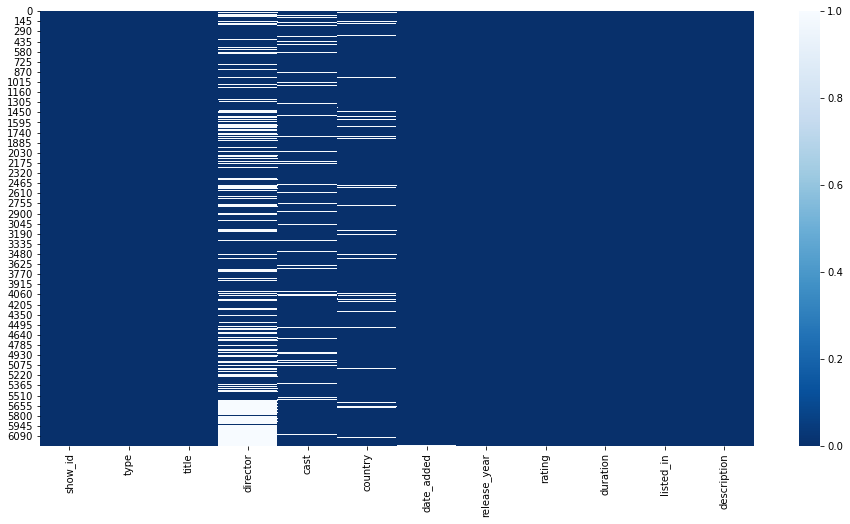

In [7]:
#Visualizing the missing data
mlb.figure(figsize = (16,8))
sns.heatmap(data.isnull(), cbar=True, cmap="Blues_r")

<AxesSubplot:>

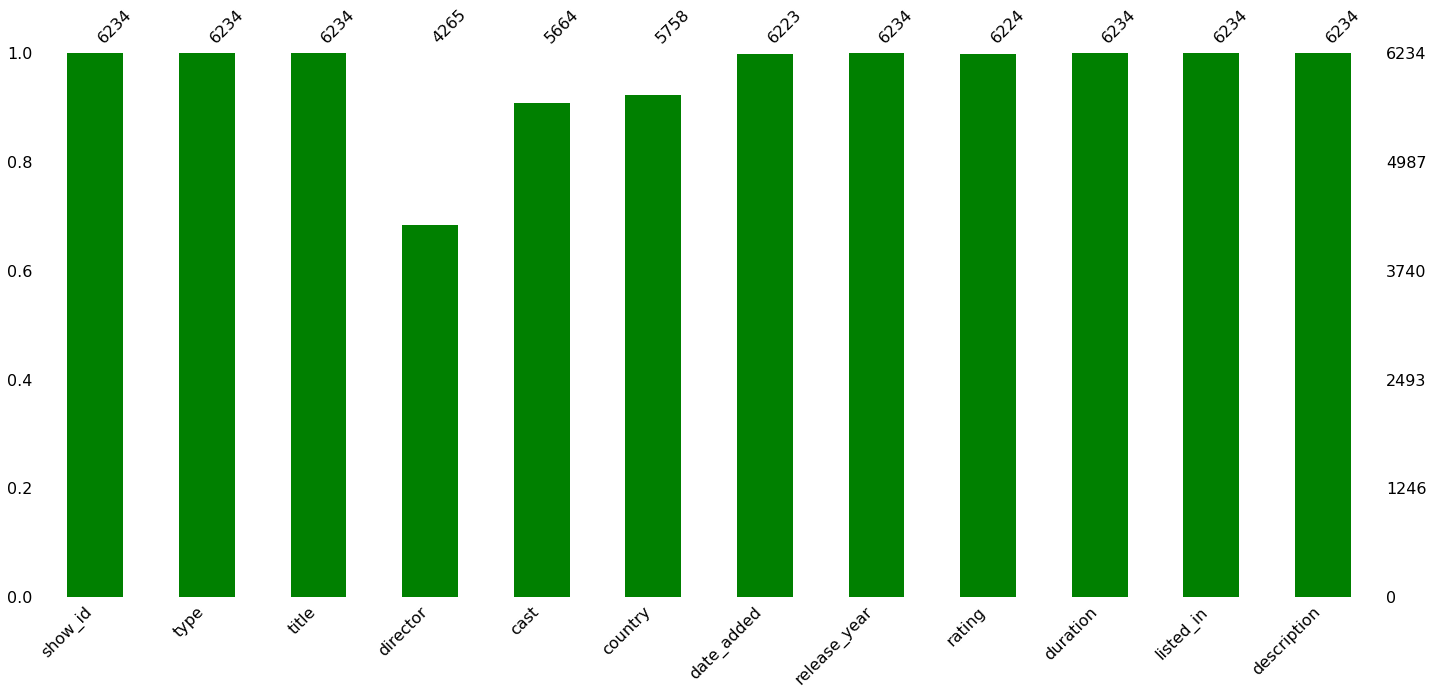

In [8]:
msno.bar(data, color="green")

In [9]:
#Dealing with missing values - Director, Cast, country
#They can not be identifed used Mean, Median and mode

data["director"] = data['director'].fillna('Unknown')
data["cast"] = data['cast'].fillna('Unknown')
data["country"] = data['country'].fillna('Unknown')

In [10]:
data["date_added"] = data['date_added'].fillna(data['date_added'].mode()[0])

In [11]:
data["rating"] = data['rating'].fillna(data['rating'].mode()[0])

Series([], dtype: int64)


<AxesSubplot:>

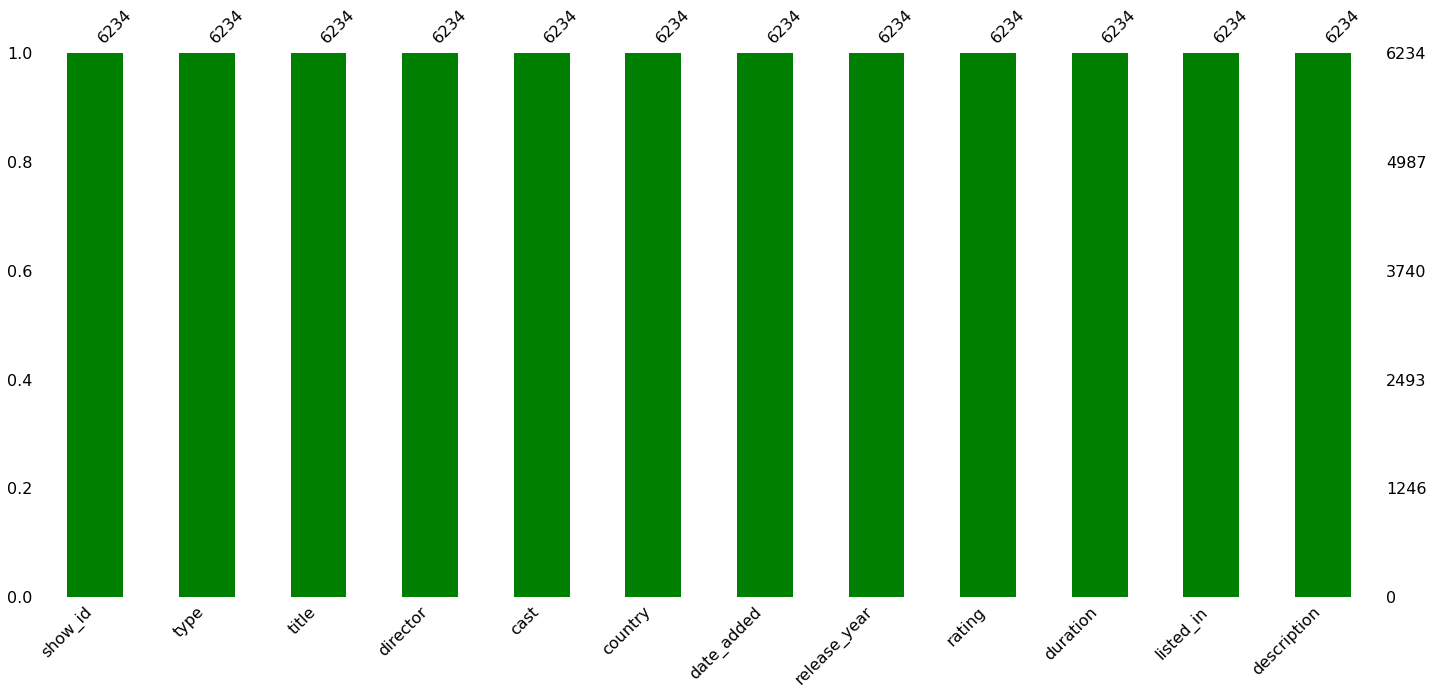

In [12]:
null_counts = data.isnull().sum()
print(null_counts[null_counts > 0])

msno.bar(data, color="green")

In [35]:
#Analyszing and visualizing the data
df = data.groupby('release_year').count().reset_index().sort_values(ascending = False, by="show_id")[0:19]
df

,release_year,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
69,2018,1063,1063,1063,1063,1063,1063,1063,1063,1063,1063,1063
68,2017,959,959,959,959,959,959,959,959,959,959,959
70,2019,843,843,843,843,843,843,843,843,843,843,843
67,2016,830,830,830,830,830,830,830,830,830,830,830
66,2015,517,517,517,517,517,517,517,517,517,517,517
65,2014,288,288,288,288,288,288,288,288,288,288,288
64,2013,237,237,237,237,237,237,237,237,237,237,237
63,2012,183,183,183,183,183,183,183,183,183,183,183
61,2010,149,149,149,149,149,149,149,149,149,149,149
62,2011,136,136,136,136,136,136,136,136,136,136,136


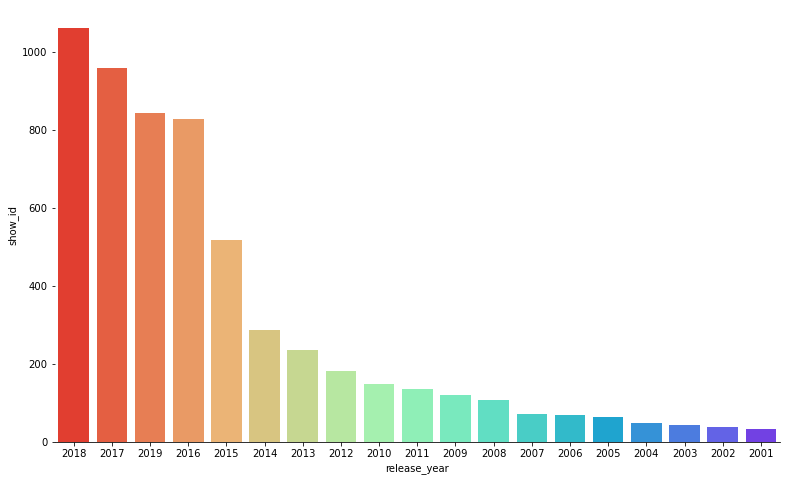

In [39]:
mlb.figure(figsize=(13,8))
sns.barplot(x='release_year',y='show_id', data=df, order=df['release_year'], palette='rainbow_r')
sns.despine(left=True)

In [33]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Text(0.5, 1.0, 'Total number of shows according to type')

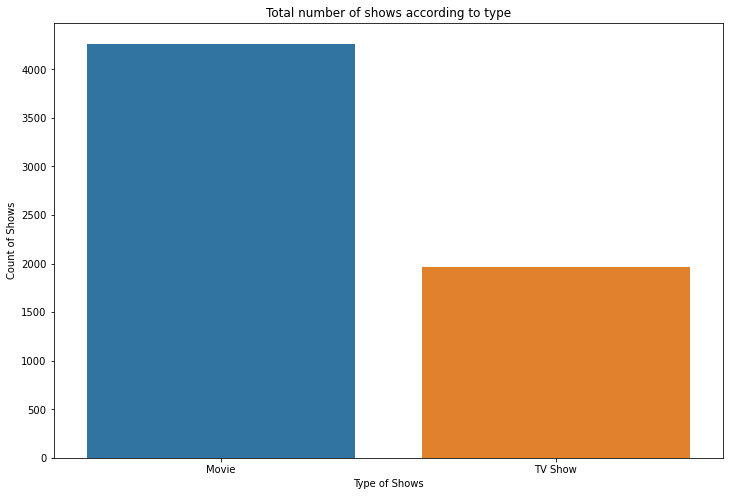

In [44]:
#Investigating the type of content and quantity
mlb.figure(figsize = (12, 8))
sns.countplot(x='type', data=data)
mlb.xlabel('Type of Shows')
mlb.ylabel('Count of Shows')
mlb.title('Total number of shows according to type')

(1990.0, 2020.0)

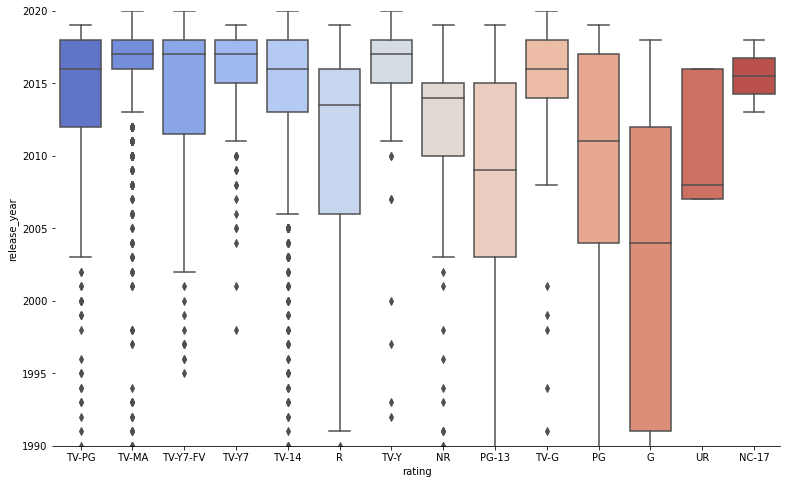

In [46]:
mlb.figure(figsize=(13,8))
sns.boxplot(y='release_year', x='rating', data=data, palette='coolwarm')
sns.despine(left=True)
mlb.ylim(1990,2020)

In [57]:
#What year had the highest number of shows added
D_added = data.groupby('date_added').count().reset_index().sort_values(ascending=False, by='type')[0:25]
D_added

,date_added,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description
784,"January 1, 2020",133,133,133,133,133,133,133,133,133,133,133
1230,"November 1, 2019",94,94,94,94,94,94,94,94,94,94,94
1053,"March 1, 2018",78,78,78,78,78,78,78,78,78,78,78
667,"December 31, 2019",74,74,74,74,74,74,74,74,74,74,74
1322,"October 1, 2018",72,72,72,72,72,72,72,72,72,72,72
1323,"October 1, 2019",71,71,71,71,71,71,71,71,71,71,71
881,"July 1, 2019",60,60,60,60,60,60,60,60,60,60,60
1229,"November 1, 2018",59,59,59,59,59,59,59,59,59,59,59
782,"January 1, 2018",54,54,54,54,54,54,54,54,54,54,54
390,"April 1, 2018",47,47,47,47,47,47,47,47,47,47,47


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'January 1, 2020'),
  Text(1, 0, 'November 1, 2019'),
  Text(2, 0, 'March 1, 2018'),
  Text(3, 0, 'December 31, 2019'),
  Text(4, 0, 'October 1, 2018'),
  Text(5, 0, 'October 1, 2019'),
  Text(6, 0, 'July 1, 2019'),
  Text(7, 0, 'November 1, 2018'),
  Text(8, 0, 'January 1, 2018'),
  Text(9, 0, 'April 1, 2018'),
  Text(10, 0, 'October 1, 2017'),
  Text(11, 0, 'September 1, 2017'),
  Text(12, 0, 'May 1, 2017'),
  Text(13, 0, 'May 1, 2018'),
  Text(14, 0, 'February 1, 2019'),
  Text(15, 0, 'July 1, 2018'),
  Text(16, 0, 'January 1, 2019'),
  Text(17, 0, 'August 1, 2018'),
  Text(18, 0, 'March 10, 2017'),
  Text(19, 0, 'August 1, 2017'),
  Text(20, 0, 'July 1, 2017'),
  Text(21, 0, 'November 20, 2019'),
  Text(22, 0, 'September 1, 2019'),
  Text(23, 0, 'March 1, 2019'),
  Text(24, 0, 'November 1, 2017')])

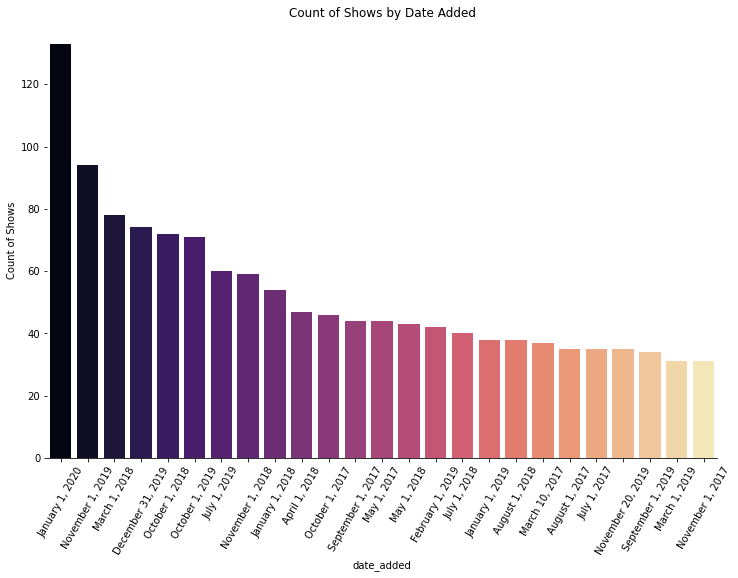

In [58]:
mlb.figure(figsize = (12, 8))
sns.barplot(x='date_added', data=D_added, y='type', palette='magma')
sns.despine(left=True)
mlb.ylabel('Count of Shows')
mlb.title('Count of Shows by Date Added')
mlb.xticks(rotation=60)

(2000.0, 2020.0)

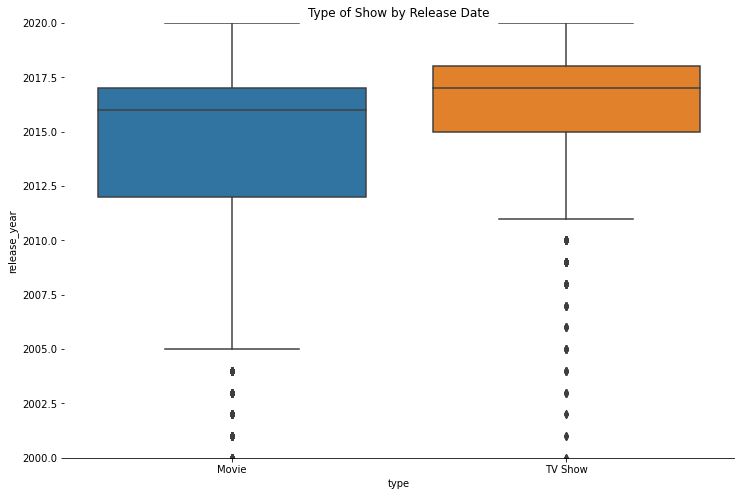

In [60]:
#Movies and TV Shows Box plot with magnifying view. It sees tv shows have a more recent release_year.
#This means tv shows are releasing more in recent years

mlb.figure(figsize=(12,8))
sns.boxplot(x='type', y='release_year', data=data )
sns.despine(left=True)
mlb.title('Type of Show by Release Date')
mlb.ylim(2000,2020)

In [62]:
dur = data.groupby('duration').count().reset_index().sort_values(ascending=False, by='type')[0:20]
dur

,duration,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description
0,1 Season,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
105,2 Seasons,304,304,304,304,304,304,304,304,304,304,304
123,3 Seasons,158,158,158,158,158,158,158,158,158,158,158
191,90 min,111,111,111,111,111,111,111,111,111,111,111
192,91 min,104,104,104,104,104,104,104,104,104,104,104
193,92 min,101,101,101,101,101,101,101,101,101,101,101
196,95 min,94,94,94,94,94,94,94,94,94,94,94
195,94 min,94,94,94,94,94,94,94,94,94,94,94
194,93 min,90,90,90,90,90,90,90,90,90,90,90
198,97 min,88,88,88,88,88,88,88,88,88,88,88


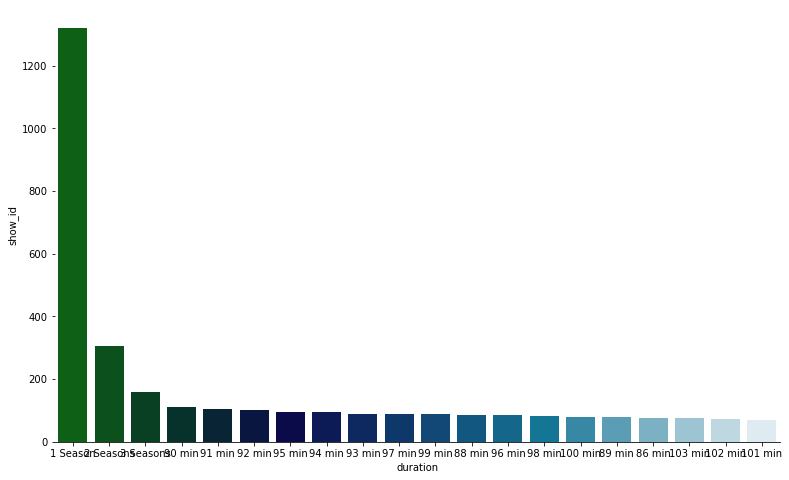

In [65]:
mlb.figure(figsize=(13,8))
sns.barplot(x='duration',y='show_id', data=dur, order=dur['duration'], palette='ocean')
sns.despine(left=True)

In [85]:
#top 15 countries with highest number of content over the years.
top_15 = data.groupby('country').count().reset_index().sort_values(ascending=False,by='show_id')[0:15]['country']

In [86]:
top_15_df = data[data['country'].isin(top_15)]
top_15_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,Unknown,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,Unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,"January 1, 2020",2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,Unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,"January 1, 2020",2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,Unknown,Unknown,Unknown,"January 1, 2020",2016,TV-MA,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,Unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,"January 1, 2020",2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


C:\Users\Efemena Ikpro\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Efemena Ikpro\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Efemena Ikpro\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Efemena Ikpro\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Efemena Ikpro\Anaconda3\lib\site-packages\seaborn\categorical.p

(1970.0, 2020.0)

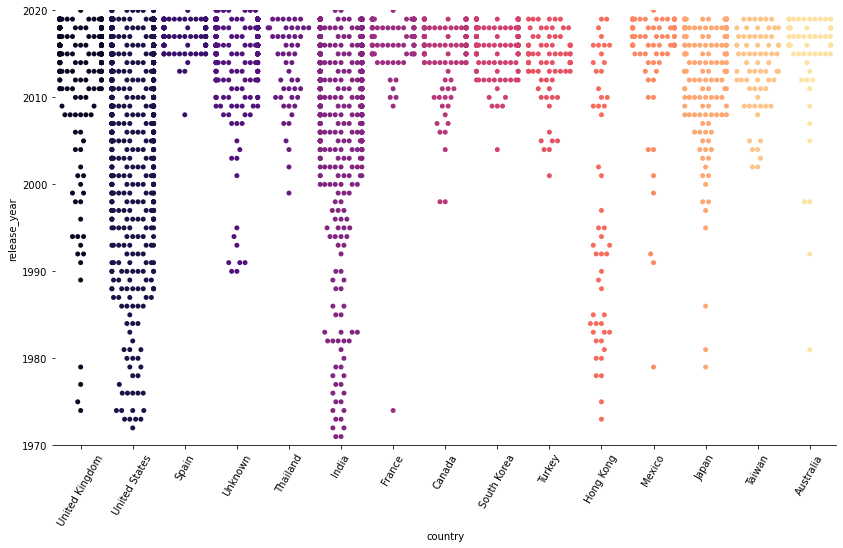

In [87]:
mlb.figure(figsize=(14,8))
sns.swarmplot(x='country', y='release_year', data=top_15_df, palette='magma')
sns.despine(left=True)
mlb.xticks(rotation=60)
mlb.ylim(1970,2020)

In [88]:
cou = data.groupby('country').count().reset_index().sort_values(ascending=False, by='type')[0:25]
cou

,country,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description
443,United States,2032,2032,2032,2032,2032,2032,2032,2032,2032,2032,2032
194,India,777,777,777,777,777,777,777,777,777,777,777
547,Unknown,476,476,476,476,476,476,476,476,476,476,476
379,United Kingdom,348,348,348,348,348,348,348,348,348,348,348
249,Japan,176,176,176,176,176,176,176,176,176,176,176
51,Canada,141,141,141,141,141,141,141,141,141,141,141
327,South Korea,136,136,136,136,136,136,136,136,136,136,136
334,Spain,117,117,117,117,117,117,117,117,117,117,117
133,France,90,90,90,90,90,90,90,90,90,90,90
259,Mexico,83,83,83,83,83,83,83,83,83,83,83


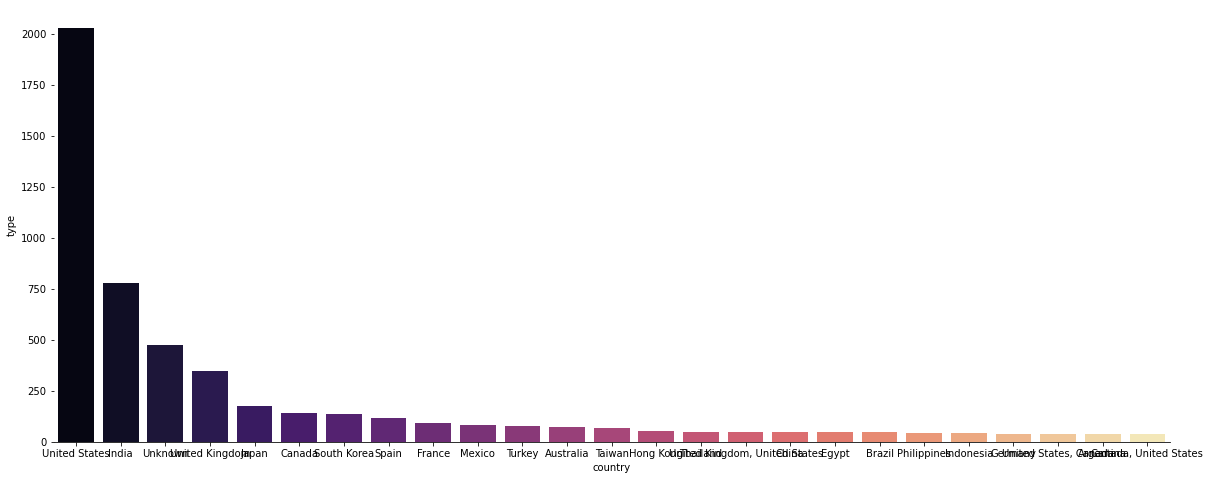

In [90]:
mlb.figure(figsize = (20,8))
sns.barplot(x='country', data=cou, y='type', palette='magma')
sns.despine(left=True)
mlb.xticks(rotation=60)